# Tvungen, dempet svingning

Vi ser på en mass $m$ som er koblet til en fjær, en demper og er drevet av en ekstern kraft. Likningen er gitt ved
$$ m \frac{d^2 x}{dt^2} + b \frac{d x}{d t} + k x = F_0 \cos \omega_d t .$$

Først definerer vi høyresiden i ODE-systemet vi må løse og en enkel funksjon som finner amplituden til oscillasjonen som oppstår.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def rhs(t, y, omega, gamma, F0, omega_d):
    # Driven, damped harmonic oscillator
    # y[0] = x, y[1] = dx/dt
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = - 2 * gamma * y[1] - omega**2 * y[0] + F0 * np.cos(omega_d * t)
    return dydt

def find_amplitude(t, x):
    # Estimate amplitude from the last few oscillations
    steady_state_start = int(0.7 * len(t))  # Start looking for amplitude in the last 30% of the data
    x_steady = x[steady_state_start:]
    amplitude = (np.max(x_steady) - np.min(x_steady)) / 2
    return amplitude

Først simulerer vi dempede svingninger for å illustrere de tre tilfellene _underdempet_, _overdempet_ og _kritisk dempet_ svingning.

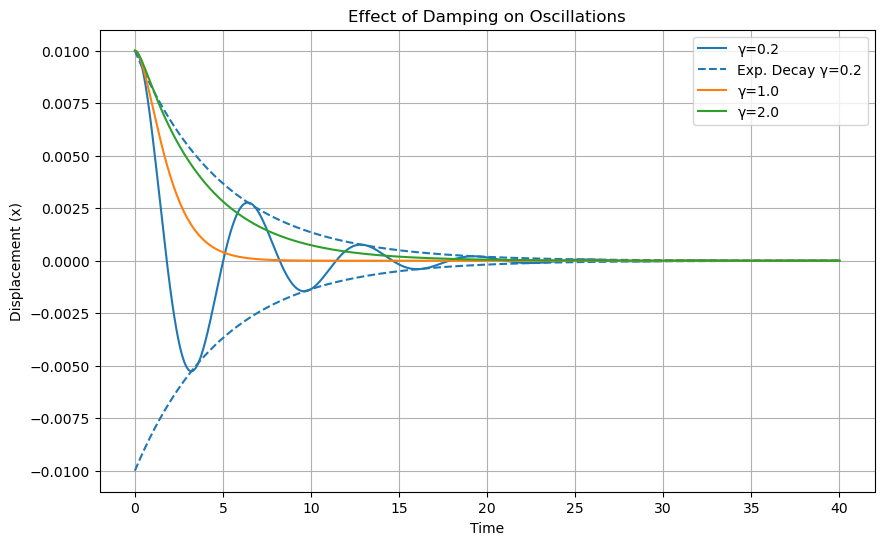

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
T = 40
gamma = 0.1  # Damping coefficient
omega = 1.0  # Natural frequency
F0 = 0
omega_d = 0.2  # Driving frequency
y0 = [0.01, 0.0]  # Initial conditions: x(0) = 0, dx/dt(0) = 0

for gamma in [0.2, 1.0, 2.0]:
    sol = solve_ivp(rhs, [0, T], y0, args=(omega, gamma, F0, omega_d), t_eval=np.linspace(0, T, 1000))
    ax.plot(sol.t, sol.y[0], label=f'γ={gamma}')
    if gamma < 1.0:
        # with the same color, plot the exponential decay envelope
        col = ax.lines[-1].get_color()
        ax.plot(sol.t, y0[0]*np.exp(-gamma * sol.t), '--', label=f'Exp. Decay γ={gamma}', color=col)
        ax.plot(sol.t, -y0[0]*np.exp(-gamma * sol.t), '--', color=col)
ax.set_title('Effect of Damping on Oscillations')
ax.set_xlabel('Time')
ax.set_ylabel('Displacement (x)')
ax.legend()
ax.grid()
plt.show()    

In [ ]:



T = 100.0 # Total time [s]

gamma = 0.1  # Damping coefficient
omega = 1.0  # Natural frequency
F0 = 1.0     # Driving force amplitude
omega_d = 0.2  # Driving frequency

y0 = [0.01, 0.0]  # Initial conditions: x(0) = 0, dx/dt(0) = 0

sol = solve_ivp(rhs, [0, T], y0, args=(omega, gamma, F0, omega_d), t_eval=np.linspace(0, T, 1000))

plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Displacement (x)', color='blue')
plt.plot(sol.t, sol.y[1], label='Velocity (dx/dt)', color='orange')
plt.title('Driven Damped Harmonic Oscillator')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.grid()
plt.show()

# Find amplitude of steady-state oscillations
amplitude = find_amplitude(sol.t, sol.y[0])
print(f'Steady-state amplitude: {amplitude:.4f}')

Driving frequency: 0.00, Steady-state amplitude: 0.0000
Driving frequency: 0.04, Steady-state amplitude: 1.0016
Driving frequency: 0.08, Steady-state amplitude: 1.0066
Driving frequency: 0.12, Steady-state amplitude: 1.0149
Driving frequency: 0.16, Steady-state amplitude: 1.0273
Driving frequency: 0.20, Steady-state amplitude: 1.0436
Driving frequency: 0.24, Steady-state amplitude: 1.0635
Driving frequency: 0.29, Steady-state amplitude: 1.0885
Driving frequency: 0.33, Steady-state amplitude: 1.1181
Driving frequency: 0.37, Steady-state amplitude: 1.1543
Driving frequency: 0.41, Steady-state amplitude: 1.1981
Driving frequency: 0.45, Steady-state amplitude: 1.2500
Driving frequency: 0.49, Steady-state amplitude: 1.3126
Driving frequency: 0.53, Steady-state amplitude: 1.3874
Driving frequency: 0.57, Steady-state amplitude: 1.4790
Driving frequency: 0.61, Steady-state amplitude: 1.5895
Driving frequency: 0.65, Steady-state amplitude: 1.7316
Driving frequency: 0.69, Steady-state amplitude:

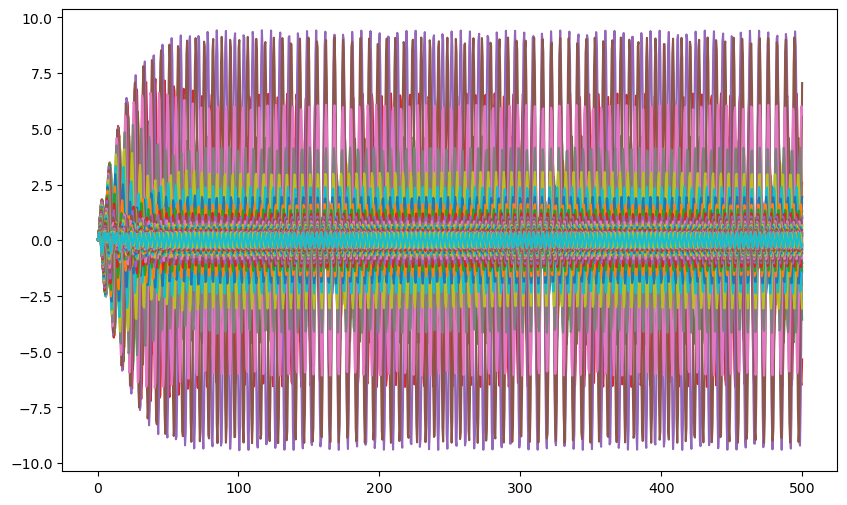

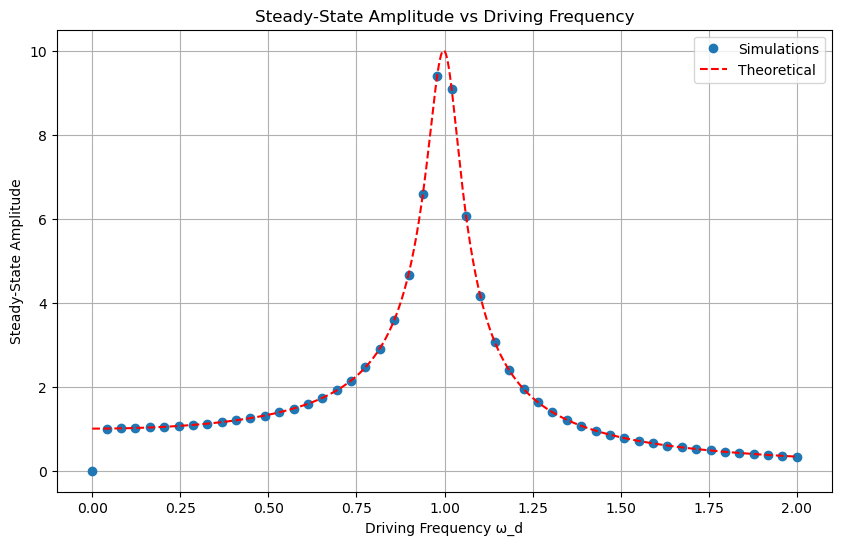

In [47]:
omega_d_ = np.linspace(0.0, 2.0*omega, 50)
amplitude_ = np.zeros_like(omega_d_)
T = 500.0  # Longer time to reach steady state for frequency sweep
gamma = 0.05  # Reduced damping for clearer resonance peak

fig, ax = plt.subplots(figsize=(10, 6))

for i, omega_d in enumerate(omega_d_):
    sol = solve_ivp(rhs, [0, T], y0, args=(omega, gamma, F0, omega_d), t_eval=np.linspace(0, T, 1000))
    amplitude_[i] = find_amplitude(sol.t, sol.y[0])
    print(f'Driving frequency: {omega_d:.2f}, Steady-state amplitude: {amplitude_[i]:.4f}')

    ax.plot(sol.t, sol.y[0], label=f'ω_d={omega_d:.2f}')

fig, ax = plt.subplots(figsize=(10, 6))
omega_d__ = np.linspace(0.0, 2.0*omega, 2000)
ax.plot(omega_d_, amplitude_, marker='o', linestyle='none', label="Simulations")
ax.plot(omega_d__, F0 / np.sqrt((omega**2 - omega_d__**2)**2 + (2 * gamma * omega_d__)**2), '--', label="Theoretical", color='red')
ax.legend()
ax.set_title('Steady-State Amplitude vs Driving Frequency')
ax.set_xlabel('Driving Frequency ω_d')
ax.set_ylabel('Steady-State Amplitude')
ax.grid()
plt.show()